200 0.16585111618041992 0.008192062377929688
300 0.0020940303802490234 0.018653154373168945
400 0.004016876220703125 0.03442502021789551
500 0.005917787551879883 0.05339789390563965
600 0.008272171020507812 0.07521986961364746
700 0.011733055114746094 0.10607004165649414
800 0.014686346054077148 0.13108611106872559
900 0.018822908401489258 0.1676321029663086
1000 0.02343606948852539 0.20833206176757812
1100 0.02808403968811035 0.24826288223266602
1200 0.03336787223815918 0.2957789897918701
1300 0.0391542911529541 0.3467261791229248
1400 0.04541921615600586 0.40297698974609375
1500 0.05279898643493652 0.46245694160461426
1600 0.060958147048950195 0.5276191234588623
1700 0.06851601600646973 0.594825029373169
1800 0.07684206962585449 0.673961877822876
1900 0.08492803573608398 0.7433977127075195
2000 0.09254121780395508 0.8261280059814453
2100 0.10409975051879883 0.9156959056854248
2200 0.11360001564025879 1.0639369487762451
2300 0.13260912895202637 1.1459920406341553
2400 0.14039397239685

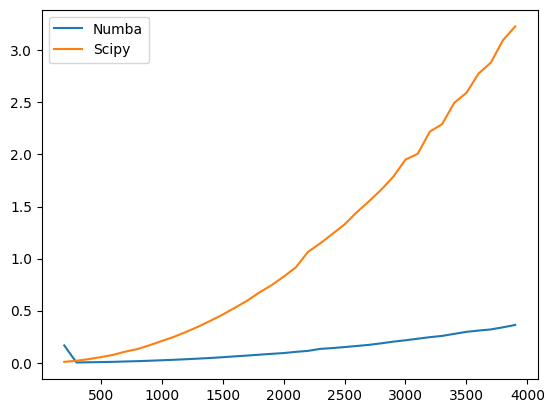

In [4]:
import time
import numpy as np
from typing import Callable

import matplotlib.pyplot as plt
from scipy.spatial import distance


from numba import jit


@jit(nopython=True)
def pdist(
    X: np.ndarray, metric: Callable[[np.ndarray, np.ndarray], float]
) -> np.ndarray:
    n = X.shape[0]
    out_size = (n * (n - 1)) // 2
    dm = list(range(out_size))
    k = 0
    for i in range(X.shape[0] - 1):
        for j in range(i + 1, X.shape[0]):
            dm[k] = metric(X[i], X[j])
            k += 1
    return dm


@jit(nopython=True)
def concept_distance(concept1: np.ndarray, concept2: np.ndarray):
    return np.mean(concept1 != concept2)


# Numba is faster than scipy

x = list(range(200, 4000, 100))
times_numba = []
times_scipy = []
for n in x:
    data = np.random.rand(n, 2)

    start = time.time()
    pdist(data, concept_distance)
    times_numba.append(time.time() - start)

    start = time.time()
    distance.pdist(data, concept_distance)
    times_scipy.append(time.time() - start)

    print(n, times_numba[-1], times_scipy[-1])

print("Numba: ", np.mean(times_numba))
print("Scipy: ", np.mean(times_scipy))
plt.plot(x, times_numba, label="Numba")
plt.plot(x, times_scipy, label="Scipy")
plt.legend()
plt.show()

0 0.16086816787719727 2.86102294921875e-06
1000 0.0017237663269042969 0.001608133316040039
2000 0.006701946258544922 0.006418943405151367
3000 0.015196084976196289 0.014472007751464844
4000 0.02704000473022461 0.027236223220825195
5000 0.04243588447570801 0.03969883918762207
6000 0.06075286865234375 0.057090044021606445
7000 0.08559489250183105 0.07783317565917969
8000 0.10808110237121582 0.10193419456481934
9000 0.13688993453979492 0.12890195846557617
Numba:  0.0645284652709961
Editdistance:  0.04551963806152344


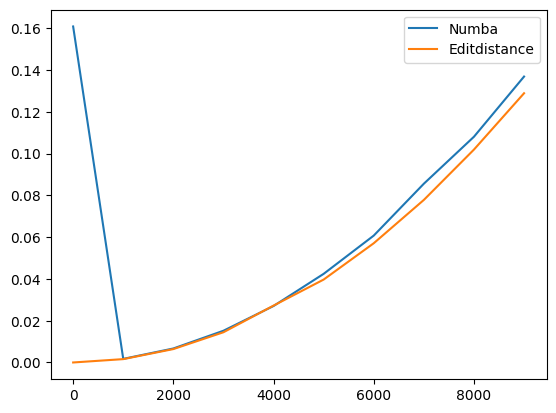

In [4]:
import time
import numpy as np

import editdistance
import matplotlib.pyplot as plt


from numba import jit


@jit(nopython=True)
def edit_distance_fast(s1: np.ndarray, s2: np.ndarray):
    if len(s1) < len(s2):
        return edit_distance_fast(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = np.arange(len(s2) + 1, dtype=np.int64)
    for i, c1 in enumerate(s1):
        current_row = np.zeros(len(s2) + 1, dtype=np.int64)
        current_row[0] = i + 1
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row[j + 1] = min(insertions, deletions, substitutions)
        previous_row = current_row

    return previous_row[-1]


# Numba is as fast as editdistance.eval

x = list(range(0, 10000, 1000))
times_numba = []
times_editeval = []
for n in x:
    s1 = np.random.randint(0, 100, n)
    s2 = np.random.randint(0, 100, n)

    start = time.time()
    edit_distance_fast(s1, s2)
    times_numba.append(time.time() - start)

    start = time.time()
    editdistance.eval(s1, s2)
    times_editeval.append(time.time() - start)

    print(n, times_numba[-1], times_editeval[-1])

print("Numba: ", np.mean(times_numba))
print("Editdistance: ", np.mean(times_editeval))
plt.plot(x, times_numba, label="Numba")
plt.plot(x, times_editeval, label="Editdistance")
plt.legend()
plt.show()

100 0.0008881092071533203 0.00045013427734375
120 0.00023603439331054688 0.00016379356384277344
140 0.00017905235290527344 0.00014710426330566406
160 0.00016689300537109375 0.00014209747314453125
180 0.00016689300537109375 0.0001442432403564453
200 0.00016498565673828125 0.00014019012451171875
220 0.00016021728515625 0.00013780593872070312
240 0.00016570091247558594 0.00014019012451171875
260 0.00017118453979492188 0.0001461505889892578
280 0.00016379356384277344 0.00014519691467285156
300 0.00016689300537109375 0.00014901161193847656
320 0.00017213821411132812 0.0001499652862548828
340 0.0004107952117919922 0.00021004676818847656
360 0.00018906593322753906 0.00015401840209960938
380 0.00017404556274414062 0.0001571178436279297
400 0.00017786026000976562 0.0001552104949951172
420 0.0001800060272216797 0.00015783309936523438
440 0.0001800060272216797 0.00016117095947265625
460 0.00018310546875 0.00016379356384277344
480 0.00018095970153808594 0.00016498565673828125
500 0.000183820724487

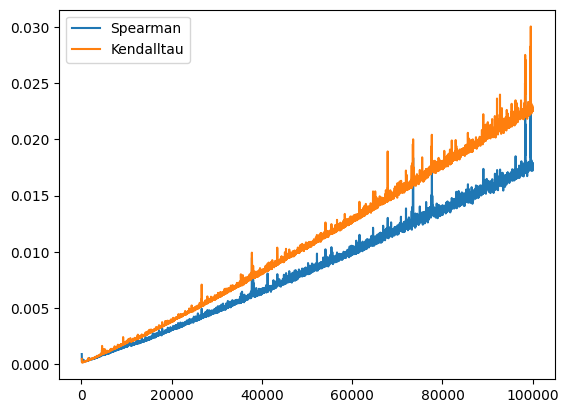

In [5]:
import time
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import spearmanr, kendalltau

# Spearman is faster than Kendalltau

ns = list(range(100, 100000, 20))
times_sprearman = []
times_kendalltau = []
for n in ns:
    data1 = np.random.rand(n)
    data2 = np.random.rand(n)

    start = time.time()
    spearmanr(data1, data2)
    times_sprearman.append(time.time() - start)

    start = time.time()
    kendalltau(data1, data2)
    times_kendalltau.append(time.time() - start)

    print(n, times_sprearman[-1], times_kendalltau[-1])

print("Spearman: ", np.mean(times_sprearman))
print("Kendalltau: ", np.mean(times_kendalltau))
plt.plot(ns, times_sprearman, label="Spearman")
plt.plot(ns, times_kendalltau, label="Kendalltau")
plt.legend()
plt.show()

10 0.08600497245788574 0.09792494773864746 0.09404325485229492 0.08317899703979492
12 0.026094913482666016 0.02250981330871582 0.015115022659301758 0.007838010787963867
14 0.04693102836608887 0.04052901268005371 0.026313066482543945 0.0133209228515625
16 0.08045530319213867 0.06879687309265137 0.04439592361450195 0.024755001068115234
18 0.13416123390197754 0.1122429370880127 0.07287907600402832 0.03481793403625488
20 0.19803166389465332 0.1617908477783203 0.10839295387268066 0.050820112228393555
22 0.2887089252471924 0.24178600311279297 0.15696215629577637 0.0749199390411377
24 0.40757203102111816 0.3409130573272705 0.22788310050964355 0.10196399688720703
26 0.5596029758453369 0.4683713912963867 0.3081936836242676 0.13735389709472656
28 0.7386641502380371 0.6240410804748535 0.413618803024292 0.18890786170959473
30 0.9657411575317383 0.8258082866668701 0.5399558544158936 0.2510409355163574
32 1.2646458148956299 1.0895869731903076 0.7288682460784912 0.34347009658813477
34 1.6549851894378

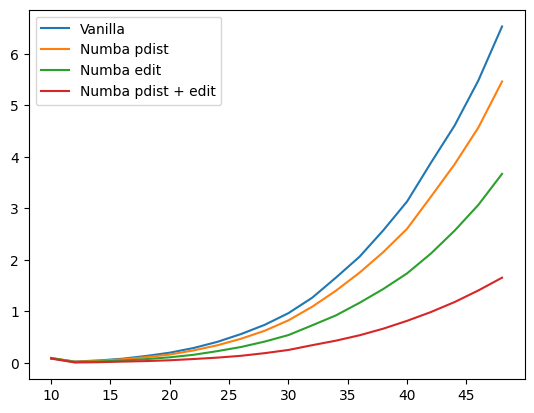

In [31]:
import torch as th
import itertools
from torch.utils.data import TensorDataset
from scipy.stats import spearmanr, kendalltau, pearsonr

from numba import jit


def create_concept_dataset(
    n_attributes: int,
    n_values: int,
    transform: Callable[[th.Tensor], th.Tensor] | None = None,
    device: th.device | str = "cpu",
) -> th.Tensor:
    dataset = (
        th.Tensor(list(itertools.product(th.arange(n_values), repeat=n_attributes)))
        .long()
        .to(device)
    )

    if transform is None:
        target = dataset
    else:
        target = transform(dataset)
    return TensorDataset(dataset, target)


@jit(nopython=True)
def pdist(X: np.ndarray, metric):
    n = X.shape[0]
    out_size = (n * (n - 1)) // 2
    dm = list(range(out_size))
    k = 0
    for i in range(X.shape[0] - 1):
        for j in range(i + 1, X.shape[0]):
            dm[k] = metric(X[i], X[j])
            k += 1
    return dm


@jit(nopython=True)
def concept_distance(concept1: np.ndarray, concept2: np.ndarray):
    return np.mean(concept1 != concept2)


@jit(nopython=True)
def edit_distance_fast(s1: np.ndarray, s2: np.ndarray):
    if len(s1) < len(s2):
        return edit_distance_fast(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = np.arange(len(s2) + 1, dtype=np.int64)
    for i, c1 in enumerate(s1):
        current_row = np.zeros(len(s2) + 1, dtype=np.int64)
        current_row[0] = i + 1
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row[j + 1] = min(insertions, deletions, substitutions)
        previous_row = current_row

    return previous_row[-1]


def topsim_vanilla(concept: np.ndarray, language: np.ndarray, corr: str = "spearman"):
    concept_pdist = distance.pdist(concept, concept_distance)
    language_pdist = distance.pdist(language, editdistance.eval)
    if corr == "spearman":
        corr = spearmanr
    elif corr == "kendall":
        corr = kendalltau
    elif corr == "pearson":
        corr = pearsonr
    else:
        raise ValueError("corr must be spearman or kendall")
    return corr(concept_pdist, language_pdist).correlation


def topsim_numbapdist(
    concept: np.ndarray, language: np.ndarray, corr: str = "spearman"
):
    concept_pdist = pdist(concept, concept_distance)
    language_pdist = distance.pdist(language, editdistance.eval)

    if corr == "spearman":
        corr = spearmanr
    elif corr == "kendall":
        corr = kendalltau
    elif corr == "pearson":
        corr = pearsonr
    else:
        raise ValueError("corr must be spearman or kendall")
    return corr(concept_pdist, language_pdist).correlation


def topsim_numbaedit(concept: np.ndarray, language: np.ndarray, corr: str = "spearman"):
    concept_pdist = distance.pdist(concept, concept_distance)
    language_pdist = distance.pdist(language, edit_distance_fast)

    if corr == "spearman":
        corr = spearmanr
    elif corr == "kendall":
        corr = kendalltau
    elif corr == "pearson":
        corr = pearsonr
    else:
        raise ValueError("corr must be spearman or kendall")
    return corr(concept_pdist, language_pdist).correlation


def topsim_numbapdist_numbaedit(
    concept: np.ndarray, language: np.ndarray, corr: str = "spearman"
):
    concept_pdist = pdist(concept, concept_distance)
    language_pdist = pdist(language, edit_distance_fast)

    if corr == "spearman":
        corr = spearmanr
    elif corr == "kendall":
        corr = kendalltau
    elif corr == "pearson":
        corr = pearsonr
    else:
        raise ValueError("corr must be spearman or kendall")
    return corr(concept_pdist, language_pdist).correlation


A = 2
V = 50
C = 50
L = 10

times_vanilla = []
times_numbapdist = []
times_numbaedit = []
times_numbapdist_numbaedit = []
V = list(range(10, 50, 2))
for v in V:
    concepts, _ = create_concept_dataset(A, v).tensors
    concepts = concepts.numpy()
    messages = np.random.randint(0, C, (concepts.shape[0], L))

    start = time.time()
    topsim_vanilla(concepts, messages)
    times_vanilla.append(time.time() - start)

    start = time.time()
    topsim_numbapdist(concepts, messages)
    times_numbapdist.append(time.time() - start)

    start = time.time()
    topsim_numbaedit(concepts, messages)
    times_numbaedit.append(time.time() - start)

    start = time.time()
    topsim_numbapdist_numbaedit(concepts, messages)
    times_numbapdist_numbaedit.append(time.time() - start)

    print(
        v,
        times_vanilla[-1],
        times_numbapdist[-1],
        times_numbaedit[-1],
        times_numbapdist_numbaedit[-1],
    )

print("Vanilla: ", np.mean(times_vanilla))
print("Numba pdist: ", np.mean(times_numbapdist))
print("Numba edit: ", np.mean(times_numbaedit))
print("Numba pdist + edit: ", np.mean(times_numbapdist_numbaedit))

plt.plot(V, times_vanilla, label="Vanilla")
plt.plot(V, times_numbapdist, label="Numba pdist")
plt.plot(V, times_numbaedit, label="Numba edit")
plt.plot(V, times_numbapdist_numbaedit, label="Numba pdist + edit")
plt.legend()
plt.show()

1 2.6015188694000244 1.5979299545288086 2.69212007522583 0.7863717079162598
2 2.963005304336548 1.9995131492614746 2.7349119186401367 0.8519151210784912
3 3.447721004486084 2.5007801055908203 2.8470518589019775 0.9794659614562988
4 3.8578269481658936 2.919649839401245 2.9671339988708496 1.0678439140319824
5 4.282483100891113 3.363084077835083 3.07357120513916 1.1675827503204346
6 4.780290126800537 3.818725109100342 3.1966991424560547 1.2976577281951904
7 5.198103189468384 4.288103103637695 3.2558908462524414 1.3481040000915527
8 5.615499973297119 4.708428144454956 3.350775957107544 1.4594600200653076
9 6.007082939147949 5.119940996170044 3.4460337162017822 1.570159912109375
Vanilla:  4.305947939554851
Numba pdist:  3.3684616088867188
Numba edit:  3.062687635421753
Numba pdist + edit:  1.1698401239183214


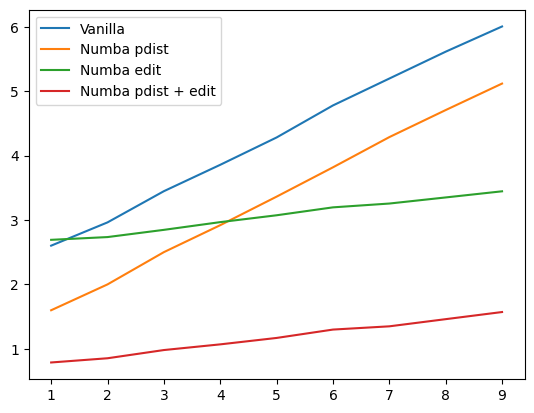

In [28]:
A = 2
V = 20
C = 50
L = 10

times_vanilla = []
times_numbapdist = []
times_numbaedit = []
times_numbapdist_numbaedit = []
L = list(range(1, 10))
for l in L:
    concepts, _ = create_concept_dataset(A, v).tensors
    concepts = concepts.numpy()
    messages = np.random.randint(0, C, (concepts.shape[0], l))

    start = time.time()
    topsim_vanilla(concepts, messages)
    times_vanilla.append(time.time() - start)

    start = time.time()
    topsim_numbapdist(concepts, messages)
    times_numbapdist.append(time.time() - start)

    start = time.time()
    topsim_numbaedit(concepts, messages)
    times_numbaedit.append(time.time() - start)

    start = time.time()
    topsim_numbapdist_numbaedit(concepts, messages)
    times_numbapdist_numbaedit.append(time.time() - start)

    print(
        l,
        times_vanilla[-1],
        times_numbapdist[-1],
        times_numbaedit[-1],
        times_numbapdist_numbaedit[-1],
    )

print("Vanilla: ", np.mean(times_vanilla))
print("Numba pdist: ", np.mean(times_numbapdist))
print("Numba edit: ", np.mean(times_numbaedit))
print("Numba pdist + edit: ", np.mean(times_numbapdist_numbaedit))

plt.plot(L, times_vanilla, label="Vanilla")
plt.plot(L, times_numbapdist, label="Numba pdist")
plt.plot(L, times_numbaedit, label="Numba edit")
plt.plot(L, times_numbapdist_numbaedit, label="Numba pdist + edit")
plt.legend()
plt.show()

10 0.006974935531616211 0.005446195602416992 0.006742000579833984
12 0.010493278503417969 0.00924825668334961 0.007267951965332031
14 0.013158798217773438 0.01194310188293457 0.01146697998046875
16 0.019798994064331055 0.019774913787841797 0.017550945281982422
18 0.030265092849731445 0.030457258224487305 0.028575897216796875
20 0.05254220962524414 0.048583030700683594 0.04386782646179199


/Users/takadajunya/Documents/GitHub/CoLingo/.venv/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


22 0.06843805313110352 0.06799793243408203 0.06559991836547852
24 0.09810471534729004 0.0945439338684082 0.0880887508392334
26 0.1297440528869629 0.13694190979003906 0.12170100212097168
28 0.17874908447265625 0.18203973770141602 0.1635282039642334
30 0.23015618324279785 0.2366960048675537 0.20791172981262207
32 0.29875707626342773 0.3040499687194824 0.27558088302612305
34 0.3847842216491699 0.38777709007263184 0.3442518711090088
36 0.4839658737182617 0.48775196075439453 0.44790077209472656
38 0.6273207664489746 0.6349551677703857 0.5638670921325684
40 0.7425022125244141 0.7667081356048584 0.6661760807037354
42 0.9143741130828857 0.9324038028717041 0.8348388671875
44 1.1088979244232178 1.1166341304779053 1.0038559436798096
46 1.325225830078125 1.341357946395874 1.2095870971679688
48 1.5383870601654053 1.559678077697754 1.3980059623718262
Spearman:  0.41313202381134034
Kendall:  0.41874942779541013
Pearson:  0.3753182888031006


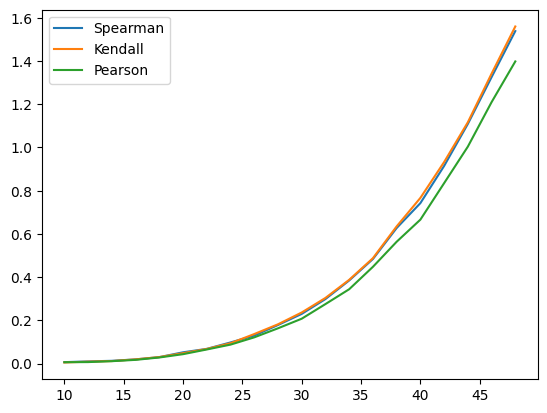

In [32]:
A = 2
V = 50
C = 50
L = 10

# Spearman vs Kendall vs Pearson
times_spearman = []
times_kendall = []
times_pearson = []
V = list(range(10, 50, 2))
for v in V:
    concepts, _ = create_concept_dataset(A, v).tensors
    concepts = concepts.numpy()
    messages = np.random.randint(0, C, (concepts.shape[0], l))

    start = time.time()
    topsim_numbapdist_numbaedit(concepts, messages, corr="spearman")
    times_spearman.append(time.time() - start)

    start = time.time()
    topsim_numbapdist_numbaedit(concepts, messages, corr="kendall")
    times_kendall.append(time.time() - start)

    start = time.time()
    topsim_numbapdist_numbaedit(concepts, messages, corr="pearson")
    times_pearson.append(time.time() - start)

    print(
        v,
        times_spearman[-1],
        times_kendall[-1],
        times_pearson[-1],
    )

print("Spearman: ", np.mean(times_spearman))
print("Kendall: ", np.mean(times_kendall))
print("Pearson: ", np.mean(times_pearson))

plt.plot(V, times_spearman, label="Spearman")
plt.plot(V, times_kendall, label="Kendall")
plt.plot(V, times_pearson, label="Pearson")
plt.legend()
plt.show()

0.13781559309012453 0.13762749325480028 0.1373929324953651
-0.0029258532497615387 -0.0029223590884379204 -0.002655600277106326
0.7388268033201955 0.7384290285865028 0.7351241919315379
0.7070573908383567 0.7066335983111528 0.7044840858219408
0.7191120103012038 0.7187204575490294 0.7157102393704631
-0.0019035861690149909 -0.0019012779194642622 -0.0020807862270365383
0.09432042174301927 0.09420828983059396 0.0950196129197099
0.2667792494020325 0.26654023400224247 0.2662144458612342
0.8171673666926079 0.8168728479180573 0.814840715824281
0.06760929902140124 0.06753055415051354 0.06843370009634578
0.10149863223550647 0.10138222188937793 0.10289750981734794
0.01669188384324283 0.01667183713468242 0.016398907598641866
0.24927968351519894 0.24895087603824806 0.25135312448464375
0.007342369877853046 0.007332125800643651 0.0070604883317992384
0.06825938202863222 0.06818029861309323 0.06908127823944821
0.8256590931637804 0.8253564311033792 0.8231931625132249
0.16110698480782612 0.1609212244907063

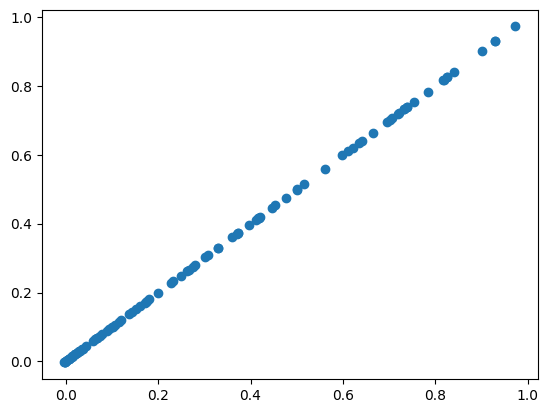

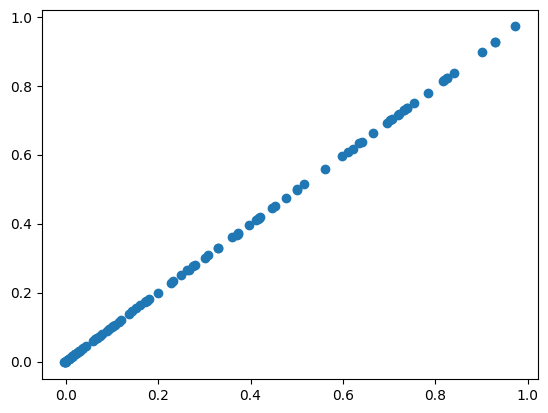

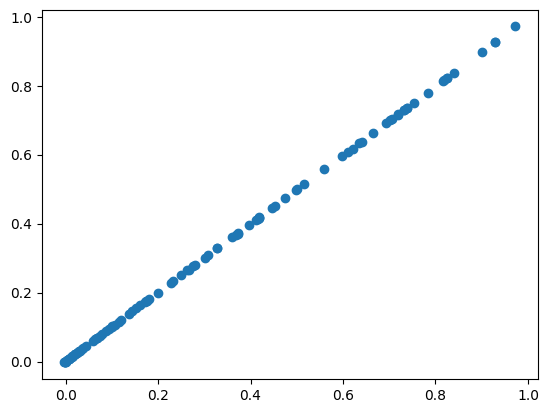

In [34]:
import random

A = 2
V = 20
C = 50
L = 10

# Spearman vs Kendall vs Pearson
values_spearman = []
values_kendall = []
values_pearson = []
for _ in range(100):
    concepts, _ = create_concept_dataset(A, V).tensors
    concepts: np.ndarray = concepts.numpy()
    messages = concepts
    shape = messages.shape

    noise_rate = random.random()
    flat = messages.flatten()
    n_noise = int(noise_rate * flat.shape[0])
    idx = np.random.choice(flat.shape[0], n_noise, replace=False)
    noise = np.random.randint(0, V, n_noise)
    flat[idx] = noise
    messages = flat.reshape(shape)

    sp = topsim_numbapdist_numbaedit(concepts, messages, corr="spearman")
    values_spearman.append(sp)

    ke = topsim_numbapdist_numbaedit(concepts, messages, corr="kendall")
    values_kendall.append(ke)

    pe = topsim_numbapdist_numbaedit(concepts, messages, corr="pearson")
    values_pearson.append(pe)

    print(
        sp,
        ke,
        pe,
    )

print("Spearman: ", np.mean(values_spearman))
print("Kendall: ", np.mean(values_kendall))
print("Pearson: ", np.mean(values_pearson))

# spearman and kendall scatter plot
plt.scatter(values_spearman, values_kendall)
plt.show()

# spearman and pearson scatter plot
plt.scatter(values_spearman, values_pearson)
plt.show()

# kendall and pearson scatter plot
plt.scatter(values_kendall, values_pearson)
plt.show()
